# Part 1 - Loading Data
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import glob, os, sys, gc, subprocess
sys.path.insert(0, '../utils') # for import customed modules
from utils import conf_pyspark, print_filesize, load_dataset
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 120)

# for plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## 1 The Papers Past Dataset

In [2]:
# set path of raw data
path = r'../data/papers_past'

**Check total dataset directory size:**

In [3]:
print('Total size:', subprocess.check_output(['du','-sh', path]).split()[0].decode('utf-8'))

Total size: 33G


**Check dataset files path and size:**

In [4]:
files = glob.glob(path + '/*.txt')
files.sort()
print_filesize(files)

1 ../data/papers_past/Akaroa Mail and Banks Peninsula Advertiser.txt 198.2 MB
2 ../data/papers_past/Albertland Gazette.txt 266.6 KB
3 ../data/papers_past/Ashburton Guardian.txt 882.2 MB
4 ../data/papers_past/Auckland Star.txt 1.2 GB
5 ../data/papers_past/Bay Of Plenty Times.txt 403.4 MB
6 ../data/papers_past/Bruce Herald.txt 300.1 MB
7 ../data/papers_past/Bush Advocate.txt 178.4 MB
8 ../data/papers_past/Clutha Leader.txt 245.5 MB
9 ../data/papers_past/Colonist.txt 970.4 MB
10 ../data/papers_past/Daily Southern Cross.txt 796.9 MB
11 ../data/papers_past/Daily Telegraph.txt 456.1 MB
12 ../data/papers_past/Ellesmere Guardian.txt 342.0 MB
13 ../data/papers_past/Evening Post.txt 5.9 GB
14 ../data/papers_past/Fair Play.txt 3.0 MB
15 ../data/papers_past/Feilding Star.txt 823.5 MB
16 ../data/papers_past/Grey River Argus.txt 946.6 MB
17 ../data/papers_past/Hawera & Normanby Star.txt 1.3 GB
18 ../data/papers_past/Hawke's Bay Herald.txt 424.6 MB
19 ../data/papers_past/Hawke's Bay Weekly Times.txt 

**Check total samples/rows/documents of the dataset:**

In [5]:
# list of each file line number
lines = [sum(1 for line in open(f)) for f in files] 

print('Total sample number:', sum(lines))

Total sample number: 16731578


**Visualize the dataset based on the file/publisher:**

In [6]:
# list of each file name
names = [os.path.splitext(os.path.basename(f))[0] for f in files] 
# dictionary of each file path and line number
info = dict(zip(names, lines)) 

# transform dict of dataset files to dataframe for statistic and ploting.
df_info = pd.DataFrame.from_dict(info, orient='index').reset_index()
df_info.columns = ['publisher', 'lines']
df_info = df_info.sort_values('lines', ascending=False).reset_index(drop=True)
df_info.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
publisher,Evening Post,Hawera & Normanby Star,Wanganui Chronicle,Otago Daily Times,Marlborough Express,Auckland Star,Poverty Bay Herald,Colonist,Ashburton Guardian,Grey River Argus,Thames Star,Feilding Star,Star,Wanganui Herald,Wairarapa Daily Times,Nelson Evening Mail,Otago Witness,Taranaki Herald,West Coast Times,Northern Advocate,North Otago Times,Bay Of Plenty Times,Daily Telegraph,Hawke's Bay Herald,Daily Southern Cross,Southland Times,Timaru Herald,Ellesmere Guardian,NZ Truth,Ohinemuri Gazette,Bruce Herald,Tuapeka Times,Observer,Bush Advocate,Mataura Ensign,Akaroa Mail and Banks Peninsula Advertiser,Clutha Leader,New Zealand Tablet,Manawatu Standard,Wellington Independent,"Rodney and Otamatea Times, Waitemata and Kaipara Gazette",Inangahua Times,Waikato Times,Manawatu Herald,Taranaki Daily News,Nelson Examiner and New Zealand Chronicle,Manawatu Times,Otautau Standard and Wallace County Chronicle,Lyttelton_Times,Te Aroha News,Hutt News,Kaipara and Waitemata Echo,New Zealand Spectator and Cook's Strait Guardian,New Zealand Free Lance,Waiapu Church Gazette,Oxford Observer,New Zealander,New Zealand Gazette and Wellington Spectator,Waimate Daily Advertiser,New Zealand Illustrated Magazine,Progress,Hawke's Bay Weekly Times,New Zealand Colonist and Port Nicholson Advertiser,Kai Tiaki,Fair Play,Waiapu Church Times,New Zealand Advertiser and Bay of Islands Gazette,Albertland Gazette
lines,3007465,807068,804226,747706,711069,674134,643505,638055,603346,574017,562647,467377,431855,420421,375253,343312,329016,328784,314293,290601,283063,246233,217769,216671,215102,211876,205144,182751,135108,133499,120432,116973,116157,101273,98941,96608,88108,79804,79269,76112,75831,70689,61250,59989,59712,51238,43499,40199,28911,26683,16138,15809,14283,14232,13733,9908,9886,5400,5037,4201,3216,1690,1650,1630,1180,245,184,112


Text(0.5, 0, 'File/Publisher')

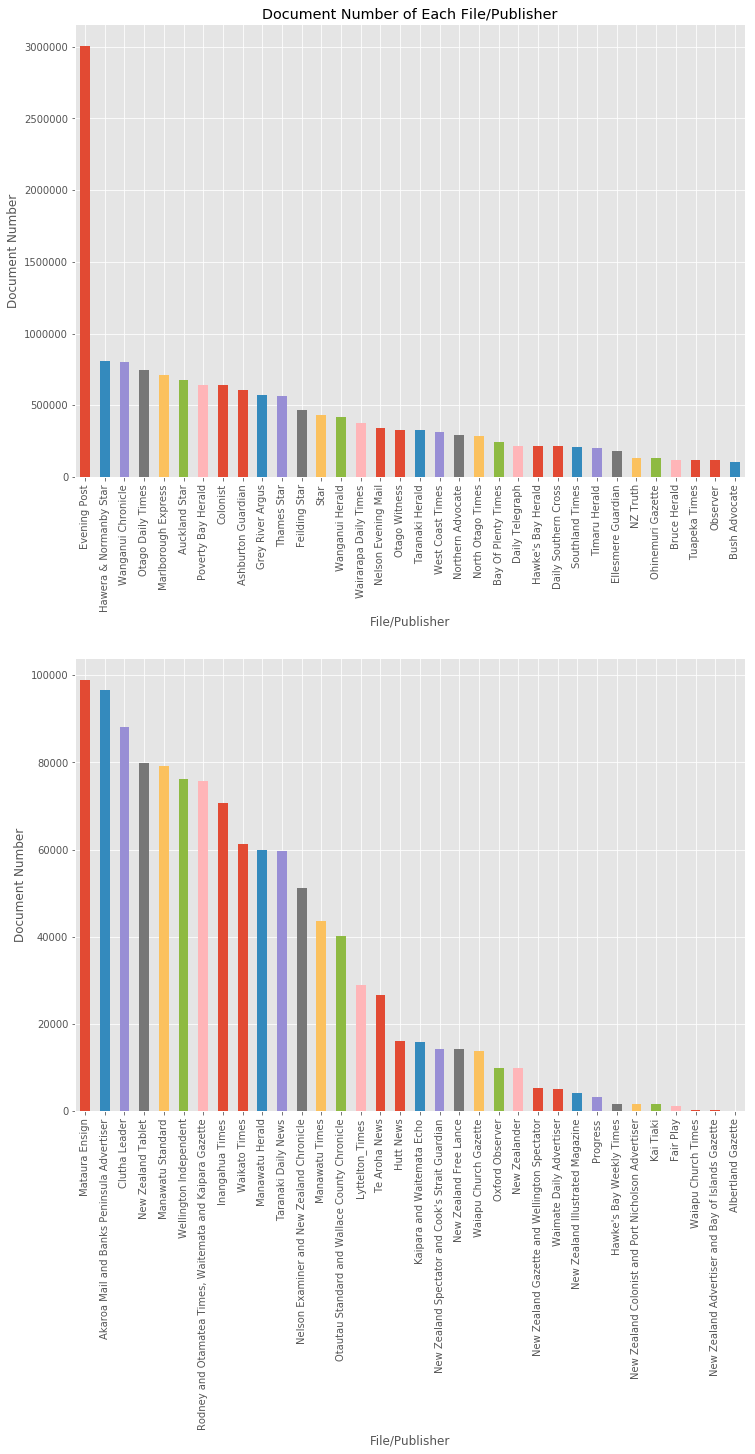

In [7]:
# index of half dataframe, split dataframe to plot better
i = int(df_info.shape[0]/2)

# plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 20))
fig.subplots_adjust(hspace=0.4)
df_info.iloc[:i].plot(ax=axes[0], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
df_info.iloc[i:].plot(ax=axes[1], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
axes[0].set_title('Document Number of Each File/Publisher')
axes[0].set_ylabel('Document Number')
axes[0].set_xlabel('File/Publisher')
axes[1].set_ylabel('Document Number')
axes[1].set_xlabel('File/Publisher')

**The Papers Past dataset has:**
* total **33** GB,
* total **68** files/publishers, 
* total **16,731,578** lines/samples/rows/documents, 
* each file contains lines from 3,007,465 (Evening Post) to 112 (Albertland Gazette).

## 2 Loading Dataset With PySpark

**For 33 GB dataset, we chose using PySpark as our data process plateform.**

In [8]:
# intiate PySpark
sc, spark = conf_pyspark()

sc

[('spark.driver.host', 'x99.hub'),
 ('spark.app.name', 'local'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.memory', '62g'),
 ('spark.master', 'local[*]'),
 ('spark.driver.port', '33664'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1548142945425'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.cores', '6'),
 ('spark.driver.maxResultSize', '4g')]


<SparkContext master=local[*] appName=local>

**Load dataset:**

In [9]:
df = load_dataset('papers_past', spark)

**Print random rows of the loaded dataframe, and check row number of the loaded dataframe:**

In [10]:
print('Shape of dataframe: ({}, {})'.format(df.count(), len(df.columns)))
df.sample(False, 0.00001).limit(20).toPandas().head(20)

Shape of dataframe: (16731578, 6)


,id,url,publisher,time,title,content
0,28973113,http://api.digitalnz.org/records/28973113/source,Daily Telegraph,1886-07-07T00:00:00.000Z,"Page 4 Advertisements Column 7 (Daily Telegraph, 07 July 1886)",Or the successful treatment of Chronic and Special Diseases accord. ing to the Laws of Nature and the Philosophy of ...
1,2429918,http://api.digitalnz.org/records/2429918/source,Bay Of Plenty Times,1884-05-10T00:00:00.000Z,"Page 4 Advertisements Column 4 (Bay Of Plenty Times, 10 May 1884)",",TJ ITOHBNS'S FAMOUS BLOOD RESTORER, . For Cleansing, Purifying, and Invigorating the Blood, . [Seven Years' Test in..."
2,2046582,http://api.digitalnz.org/records/2046582/source,Bay Of Plenty Times,1880-08-03T00:00:00.000Z,"Page 2 Advertisements Column 2 (Bay Of Plenty Times, 03 August 1880)","b'11 Property Assessment Mi, 1879."" FURTHER EXTENSION OF TIME FOR SENDING IN STATEMENTS. ""]^""OTICE is hereby given t..."
3,12002597,http://api.digitalnz.org/records/12002597/source,North Otago Times,1895-12-06T00:00:00.000Z,"Page 4 Advertisements Column 1 (North Otago Times, 06 December 1895)","TO TRAVELIn tho Oamaru District, and Stand ,a,t Oonflnerclal Stabjds. The Famous Amerioan Standard-bred Stallion, T7..."
4,13031612,http://api.digitalnz.org/records/13031612/source,North Otago Times,1899-04-19T00:00:00.000Z,"SHIPPING PORT OF OAMARU. (North Otago Times, 19 April 1899)","SHIPPING PORT O F OAMARU.April lO-HIgh wrtw» 0.35 »♦«*.• 10,2ARRIVED. April 18-Corlnna, «.bj» 763 tons, Foils, from ..."
5,6220823,http://api.digitalnz.org/records/6220823/source,North Otago Times,1879-10-18T00:00:00.000Z,"LONDON LETTER. (FROM OUR OWN CORRESPONDENT.) (North Otago Times, 18 October 1879)","LONDON LETTER. (FROM OUR OWN CORRESPONDENT.)Tho chief interost still contros on the war in Zululand, although happil..."
6,11579289,http://api.digitalnz.org/records/11579289/source,Wanganui Herald,1896-11-14T00:00:00.000Z,"Page 4 Advertisements Column 6 (Wanganui Herald, 14 November 1896)","18 CASES OE NEW GOODS, --""AOTBA,"" Will be opened this week. LITTLEJOHN'S 18 CASES OF NEW GOODS, Ex "" AOTE_,"" Will be..."
7,15754475,http://api.digitalnz.org/records/15754475/source,Wanganui Herald,1908-03-18T00:00:00.000Z,"PALMISTRY AND FORTUNE (Wanganui Herald, 18 March 1908)","PALMISTRY AND FORTUNETELLING.Some Salutary Fines.(Per United Piess Association i.CHRISTCHURCH, March 18Madame St. Le..."
8,16154986,http://api.digitalnz.org/records/16154986/source,Wanganui Herald,1909-06-29T00:00:00.000Z,"BOY SCOUTS. (Wanganui Herald, 29 June 1909)",BOY SCOUTS.WANGANUI CORPS.A meeting of the members of the above corps was held last evening- and was very well atten...
9,4164141,http://api.digitalnz.org/records/4164141/source,Wanganui Herald,1878-07-05T00:00:00.000Z,"Page 1 Advertisements Column 7 (Wanganui Herald, 05 July 1878)","Hotel CardsSTAR HOTEL, LAMBTON QUAY, WELLINGTON. Joseph Ames Proprietor., npHIS new and commodious Hotel, -*- fitted..."


---

In [11]:
sc.stop()
gc.collect()

75